# Object detection 

Object detection is the process of finding instances of real-world objects such as faces, bicycles, and buildings in images or videos

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import cv2
from sklearn.cluster import KMeans 
from collections import Counter 
%matplotlib inline 

slow


In [2]:
import cv2 

Color is the combination of 3 colour RGB

In [3]:
image=cv2.imread("test.jpeg")

In [4]:
image1=cv2.imread("test1.jpeg")

3D Numpy array of test image 

In [5]:
print(image)

[[[149 163 181]
  [145 159 177]
  [142 158 175]
  ...
  [ 76 116 135]
  [ 79 119 138]
  [ 79 119 138]]

 [[144 158 176]
  [143 157 175]
  [142 158 175]
  ...
  [ 73 113 132]
  [ 74 114 133]
  [ 74 114 133]]

 [[139 153 171]
  [141 155 173]
  [144 158 176]
  ...
  [ 69 109 128]
  [ 70 110 129]
  [ 68 108 127]]

 ...

 [[ 13  31  60]
  [ 12  30  59]
  [ 11  29  58]
  ...
  [ 31  81 109]
  [ 29  79 107]
  [ 27  77 105]]

 [[  5  23  52]
  [ 10  28  57]
  [ 13  31  60]
  ...
  [ 35  85 113]
  [ 32  82 110]
  [ 31  81 109]]

 [[  9  27  56]
  [ 17  35  64]
  [ 22  40  69]
  ...
  [ 36  86 114]
  [ 34  84 112]
  [ 33  83 111]]]


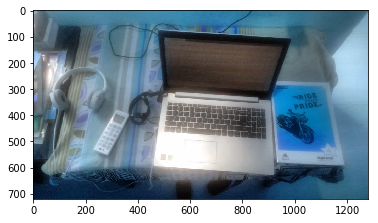

In [6]:
plt.imshow(image)

In [7]:
image.shape

(720, 1280, 3)

convert into RGB  

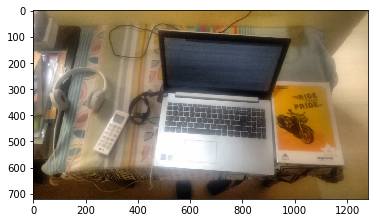

In [8]:
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

Convert into grayscale 

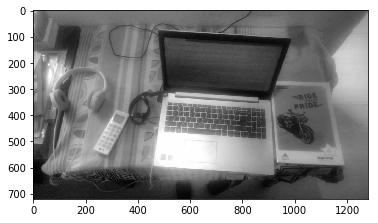

In [9]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

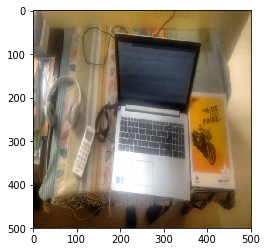

In [10]:
w=500;
h=500;
resized=cv2.resize(image,(w,h))
plt.imshow(resized)

1.7777777777777777


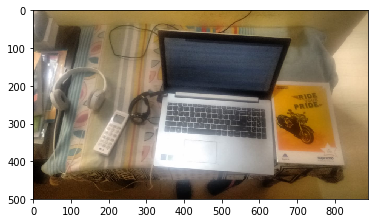

In [11]:
aspect=image.shape[1]/float(image.shape[0])
print(aspect)
if(aspect>1):
    res=int(aspect*h)
    scaled=cv2.resize(image,(res,h))
if(aspect<1):
    res=int(w/aspect)
    scaled=cv2.resize(image,(w,res))
if(aspect==1):
    scaled=cv2.resize(image,(w,h))
plt.imshow(scaled)
images=scaled                      

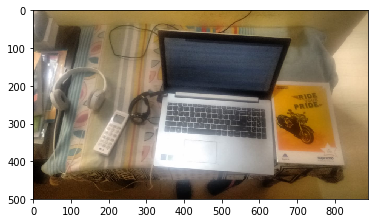

In [12]:
plt.imshow(images)

# Clustering K means  Algorithms color detection 

In [13]:
from sklearn.cluster import KMeans 
from collections import Counter 

In [14]:
def rgb2hex(rgb):
    hex="#{:02x}{:02x}{:02x}".format(int(rgb[0]),int(rgb[1]),int(rgb[2]))
    return hex
print(rgb2hex([255,0,0]))

#ff0000


In [15]:
def image_info(k):
    
    img_resize=cv2.resize(images,(64,64),interpolation=cv2.INTER_AREA)
    img_list=img_resize.reshape((img_resize.shape[0]*img_resize.shape[0],3))
    clt=KMeans(n_clusters=k)
    labels=clt.fit_predict(img_list)
    label_counts=Counter(labels)
    total_count=sum(label_counts.values())
    center_colors=list(clt.cluster_centers_)
    ordered_color=[center_colors[i]/255 for i in label_counts.keys()]
    color_labels=[rgb2hex(ordered_color[i]*255)for i in label_counts.keys()]
    plt.figure(figsize=(14,8))
    plt.subplot(221)
    plt.imshow(images)
    plt.axis('off')
    plt.subplot(222)
    plt.pie(label_counts.values(),labels=color_labels,colors=ordered_color,startangle=90)
    plt.axis('equal')
    plt.show()

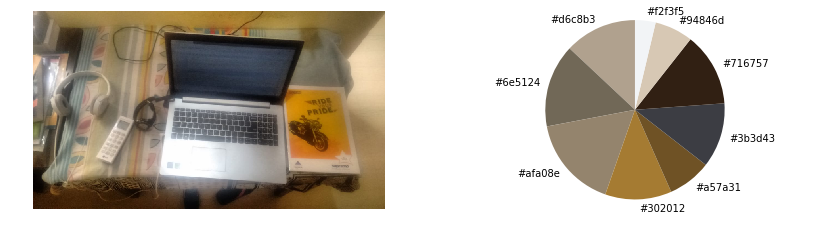

In [16]:
image_info(9)

In [17]:
from keras.applications import inception_v3

model = inception_v3.InceptionV3(weights='imagenet')

model.summary()

Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [18]:
from keras import preprocessing

img = preprocessing.image.load_img('test1.jpeg', target_size=(299, 299))
x = preprocessing.image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = inception_v3.preprocess_input(x)
predictions = model.predict(x)
labels = inception_v3.decode_predictions(predictions, top=3)[0]

labels

[('n04344873', 'studio_couch', 0.96746325),
 ('n04590129', 'window_shade', 0.0050228294),
 ('n03529860', 'home_theater', 0.0024900972)]

In [25]:
import time 
camera = cv2.VideoCapture(0)
camera_height = 500

while(True):
    _, frame = camera.read()
    frame = cv2.flip(frame, 1)

    # rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height)
    frame = cv2.resize(frame, (res, camera_height))

    # add rectangle
    cv2.rectangle(frame, (300, 75), (650, 425), (240, 100, 0), 2)

    # get ROI
    roi = frame[75+2:425-2, 300+2:650-2]
    
    
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

    roi = cv2.resize(roi, (299, 299))
    roi = inception_v3.preprocess_input(roi)

    
    roi2 = np.array([cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)])

    predictions = model.predict(roi2)

    labels = inception_v3.decode_predictions(predictions, top=3)[0]

    
    label_1 = '{} - {}%'.format(labels[0][1], int(labels[0][2]*100))
    cv2.putText(frame, label_1, (70, 170), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (20, 240, 150), 2)

    
    label_2 = '{} - {}%'.format(labels[1][1], int(labels[1][2]*100))
    cv2.putText(frame, label_2, (70, 200), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (20, 240, 240), 2)

    # add text
    label_3 = '{} - {}%'.format(labels[2][1], int(labels[2][2]*100))
    cv2.putText(frame, label_3, (70, 230), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (20, 20, 240), 2)

    # show the frame
    cv2.imshow("Real Time object detection", frame)

    key = cv2.waitKey(1)

    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()